# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient


Bad key savefig.frameon in file C:\Users\Frank\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Frank\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Frank\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API_KEY")
### Instructor AN fixed the initial .env file reading problems by recommending the load_env() command...

In [4]:
type(api_key)

str

In [5]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q="Bitcoin AND bitcoin", language="en", page_size=100, sort_by='relevancy')
print(f"Total Number of Articles with Bitcoin: {bitcoin_articles['totalResults']}")
bitcoin_articles['articles'][0]
type(bitcoin_articles)

Total Number of Articles with Bitcoin: 3712


dict

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q="Ethereum AND ethereum", language="en", page_size=100, sort_by='relevancy')
print(f"Total Number of Articles with Ethereum: {bitcoin_articles['totalResults']}")
type(ethereum_articles)

Total Number of Articles with Ethereum: 3712


dict

In [8]:
print(f"Total Number of Articles with Ethereum: {ethereum_articles['totalResults']}")
ethereum_articles['articles'][0]

Total Number of Articles with Ethereum: 1399


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [9]:
print(f"articles with Ethereum: {ethereum_articles['totalResults']}")
ethereum_articles["articles"][0]

articles with Ethereum: 1399


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [10]:
# trying to make function that in turn makes dataframes from api
def make_df(news):
    articles = []
    for item in news:
        try:
            text = item['content']
            articles.append({'text': text})
        except AttributeError:
            pass
    return pd.DataFrame(articles)
# structure from solved notebooks and refreshers
# structure also from https://www.analyticsvidhya.com/blog/2020/04/exception-handling-python/

In [11]:
# trying to make dataframe for each topic
bitcoin_df = make_df(bitcoin_articles['articles'])
bitcoin_df.dropna(inplace=True)
bitcoin_df.head()
# structure from solved notebooks and refreshers
# structure also from https://datatofish.com/create-pandas-dataframe/


,text
0,Two alleged crypto traders in Singapore appare...
1,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,“The COVID-19 pandemic has resulted in a mass ...
3,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [12]:
bitcoin_df.head()

,text
0,Two alleged crypto traders in Singapore appare...
1,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,“The COVID-19 pandemic has resulted in a mass ...
3,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [13]:
ethereum_df = make_df(ethereum_articles['articles'])
ethereum_df.dropna(inplace=True)
ethereum_df.head()

,text
0,If you've interacted with cryptocurrencies in ...
1,TL;DR: The Complete Stock and Cryptocurrency I...
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
4,LONDON (Reuters) - It sounds like a surefire b...
5,NEW YORK (Reuters) - Brooklyn-based technology...


In [14]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
#trying to make sentiment scores dictionaries
text_snt = {'text_compound': [], 'text_pos': [], 'text_neu': [], 'text_neg': []}

for index, row in bitcoin_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_snt['text_compound'].append(text_sentiment['compound'])
        text_snt['text_pos'].append(text_sentiment['pos'])
        text_snt['text_neu'].append(text_sentiment['neu'])
        text_snt['text_neg'].append(text_sentiment['neg'])
        
        #bitcoin_sentiments.append({"text": text, "date": date, "compound": compound, "positive": pos, "negative": neg, "neutral": neu})
        
    except AttributeError:
        pass
    
bitcoin_sentiment_df = pd.DataFrame(text_snt)

bitcoin_df = bitcoin_df.join(bitcoin_sentiment_df)

bitcoin_df.columns = ['Article', 'Compound', 'Positive', 'Neutral', 'Negative']

bitcoin_df.head()

# structure from solved notebooks and refreshers
# structure also from https://www.analyticsvidhya.com/blog/2020/04/exception-handling-python/
# structure from https://www.publish0x.com/everything-crypto/oldman-sachs-they-just-dont-want-to-get-it-xvrwqnv

,Article_Name,Compound,Positive,Neutral,Negative
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.840,0.16
1,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,1.000,0.00
2,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.937,0.00
3,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00
4,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00


In [15]:
bitcoin_df.head()

,Article_Name,Compound,Positive,Neutral,Negative
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.840,0.16
1,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,1.000,0.00
2,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.937,0.00
3,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00
4,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00


In [16]:
bitcoin_df.shape

(94, 5)

In [17]:
bitcoin_df.describe()

,Compound,Positive,Neutral,Negative
count,88.000000,88.000000,88.000000,88.000000
mean,0.157626,0.075557,0.882318,0.042114
std,0.464106,0.062797,0.084259,0.068476
min,-0.865800,0.000000,0.588000,0.000000
25%,0.000000,0.000000,0.831750,0.000000
50%,0.272300,0.085000,0.910000,0.000000
75%,0.507000,0.091000,0.924000,0.085000
max,0.923100,0.314000,1.000000,0.294000


In [18]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
text_snt = {'text_compound': [], 'text_pos': [], 'text_neu': [], 'text_neg': []}

for index, row in ethereum_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_snt['text_compound'].append(text_sentiment['compound'])
        text_snt['text_pos'].append(text_sentiment['pos'])
        text_snt['text_neu'].append(text_sentiment['neu'])
        text_snt['text_neg'].append(text_sentiment['neg'])
        
        #bitcoin_sentiments.append({"text": text, "date": date, "compound": compound, "positive": pos, "negative": neg, "neutral": neu})
        
    except AttributeError:
        pass
    
ethereum_sentiment_df = pd.DataFrame(text_snt)

ethereum_df = ethereum_df.join(ethereum_sentiment_df)

ethereum_df.columns = ['Article_Name', 'Compound', 'Positive', 'Neutral', 'Negative']

ethereum_df.head()

# structure from solved notebooks and refreshers
# structure also from https://www.analyticsvidhya.com/blog/2020/04/exception-handling-python/
# structure from https://www.publish0x.com/everything-crypto/oldman-sachs-they-just-dont-want-to-get-it-xvrwqnv

,Article_Name,Compound,Good,Neutral,Bad
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.791,0.000
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,1.000,0.000
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,1.000,0.000
4,LONDON (Reuters) - It sounds like a surefire b...,0.0000,0.000,1.000,0.000
5,NEW YORK (Reuters) - Brooklyn-based technology...,-0.2677,0.045,0.881,0.074


In [19]:
ethereum_df.head()

,Article_Name,Compound,Good,Neutral,Bad
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.791,0.000
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,1.000,0.000
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,1.000,0.000
4,LONDON (Reuters) - It sounds like a surefire b...,0.0000,0.000,1.000,0.000
5,NEW YORK (Reuters) - Brooklyn-based technology...,-0.2677,0.045,0.881,0.074


In [20]:
ethereum_df.describe()

,Compound,Good,Neutral,Bad
count,88.000000,88.000000,88.000000,88.000000
mean,0.138880,0.067602,0.899295,0.033080
std,0.390531,0.066984,0.081087,0.059366
min,-0.910000,0.000000,0.689000,0.000000
25%,0.000000,0.000000,0.851250,0.000000
50%,0.140300,0.067000,0.909500,0.000000
75%,0.406800,0.097000,0.954250,0.063000
max,0.851900,0.311000,1.000000,0.309000


In [21]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.head()

,Article_Name,Compound,Positive,Neutral,Negative
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.840,0.16
1,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,1.000,0.00
2,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.937,0.00
3,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00
4,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00


In [22]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.head()

,Article_Name,Compound,Good,Neutral,Bad
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.791,0.000
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,1.000,0.000
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,1.000,0.000
4,LONDON (Reuters) - It sounds like a surefire b...,0.0000,0.000,1.000,0.000
5,NEW YORK (Reuters) - Brooklyn-based technology...,-0.2677,0.045,0.881,0.074


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [24]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [34]:
# Complete the tokenizer function


frank_lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    words = []
    # Cut Punctuation
    regex_application = re.compile("[^a-zA-Z ]")
    repunctuated = regex_application.sub('', text)
    # Make List of Words
    unit = sent_tokenize(repunctuated)
    words = []
    for item in unit:
        subunit = word_tokenize(item)
        words = words + subunit
    # Change Words to Lowercase
    lower_case_words = [subunit.lower() for subunit in words]
    #Cut Stop Words
    stoppers = set(stopwords.words('english'))
    words_stoppers = [subunit for subunit in lower_case_words if subunit not in stoppers]
    # Lemmatize into Root Words
    results = [frank_lemmatizer.lemmatize(subunit) for subunit in words_stoppers]
    return results

# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/benchmarking-python-nlp-tokenizers-3ac4735100c5


In [35]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df['Tokens'] = [tokenizer(text) for text in bitcoin_df['Article_Name']]
bitcoin_df.head()
# structure from solved notebooks and refreshers
# structure also from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

,Article_Name,Compound,Positive,Neutral,Negative,Tokens
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.840,0.16,"[two, alleged, crypto, trader, singapore, appa..."
1,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,1.000,0.00,"[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.937,0.00,"[covid, pandemic, resulted, mass, shift, worki..."
3,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00,"[lagoslondon, reuters, four, month, ago, abola..."
4,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,1.000,0.00,"[lagoslondon, reuters, four, month, ago, abola..."


In [36]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df['Tokens'] = [tokenizer(text) for text in ethereum_df['Article_Name']]
ethereum_df.head()
# structure from solved notebooks and refreshers
# structure also from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

,Article_Name,Compound,Good,Neutral,Bad,Tokens
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.791,0.000,"[youve, interacted, cryptocurrencies, past, co..."
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,1.000,0.000,"[tldr, complete, stock, cryptocurrency, invest..."
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,1.000,0.000,"[september, min, readopinions, expressed, entr..."
4,LONDON (Reuters) - It sounds like a surefire b...,0.0000,0.000,1.000,0.000,"[london, reuters, sound, like, surefire, bet, ..."
5,NEW YORK (Reuters) - Brooklyn-based technology...,-0.2677,0.045,0.881,0.074,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [37]:
from collections import Counter
from nltk import ngrams

In [38]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
large_string = ' '.join(bitcoin_df['Article_Name'])
finished = tokenizer(large_string)
bigram = ngrams(finished, n = 2)
Counter(bigram).most_common(10)

# structure from solved notebooks and refreshers
# structure also from https://stackoverflow.com/questions/21844546/forming-bigrams-of-words-in-list-of-sentences-with-python

[(('satoshi', 'nakaboto'), 42),
 (('char', 'robot'), 21),
 (('robot', 'colleague'), 21),
 (('colleague', 'satoshi'), 21),
 (('nakaboto', 'writes'), 21),
 (('writes', 'bitcoin'), 21),
 (('every', 'fucking'), 21),
 (('fucking', 'daywelcome'), 21),
 (('daywelcome', 'another'), 21),
 (('another', 'edition'), 21)]

In [39]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
et_large_string = ' '.join(ethereum_df['Article_Name'])
et_finished = tokenizer(et_large_string)
et_bigram = ngrams(et_finished, n = 2)
Counter(et_bigram).most_common(10)

# structure from solved notebooks and refreshers
# structure also from https://stackoverflow.com/questions/21844546/forming-bigrams-of-words-in-list-of-sentences-with-python

[(('char', 'ethereum'), 11),
 (('decentralized', 'finance'), 10),
 (('finance', 'defi'), 8),
 (('ethereum', 'classic'), 7),
 (('ethereum', 'blockchain'), 6),
 (('char', 'bitcoin'), 6),
 (('btc', 'trading'), 5),
 (('trading', 'around'), 5),
 (('around', 'utc'), 5),
 (('ethereum', 'miner'), 5)]

In [40]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

# structure from solved notebooks and refreshers
# structure also from https://stackoverflow.com/questions/21844546/forming-bigrams-of-words-in-list-of-sentences-with-python

In [41]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

large_string = ' '.join(bitcoin_df['Article_Name'])
finished = tokenizer(large_string)
token_count(finished)

# structure from solved notebooks and refreshers
# structure also from https://litlab.stanford.edu/counting-words-in-hathitrust-with-python-and-mpi/

[('char', 94),
 ('bitcoin', 91),
 ('satoshi', 42),
 ('nakaboto', 42),
 ('every', 23),
 ('going', 23),
 ('another', 22),
 ('edition', 22),
 ('robot', 21),
 ('colleague', 21)]

In [42]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
et_large_string = ' '.join(ethereum_df['Article_Name'])
et_finished = tokenizer(et_large_string)
token_count(et_finished)


# structure from solved notebooks and refreshers
# structure also from https://litlab.stanford.edu/counting-words-in-hathitrust-with-python-and-mpi/

[('char', 94),
 ('ethereum', 63),
 ('bitcoin', 24),
 ('blockchain', 19),
 ('decentralized', 16),
 ('defi', 15),
 ('network', 14),
 ('cryptocurrency', 13),
 ('exchange', 13),
 ('token', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

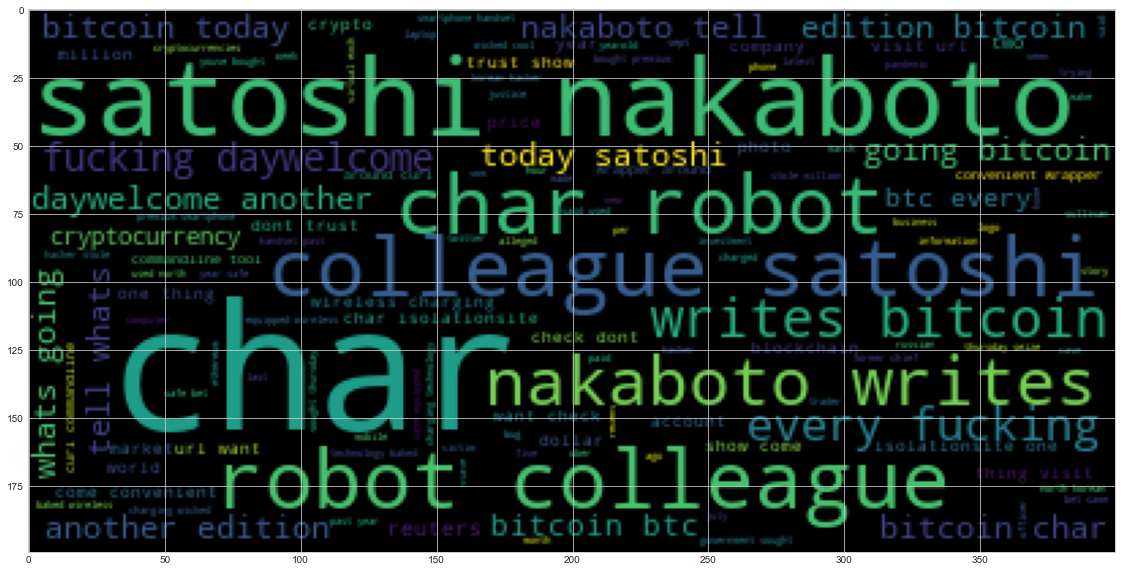

In [44]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
large_string = ' '.join(bitcoin_df['Article_Name'])
finished = tokenizer(large_string)
entering_text = ' '.join(finished)
word_cloud_bitcoin = WordCloud().generate(entering_text)
plt.imshow(word_cloud_bitcoin)


# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

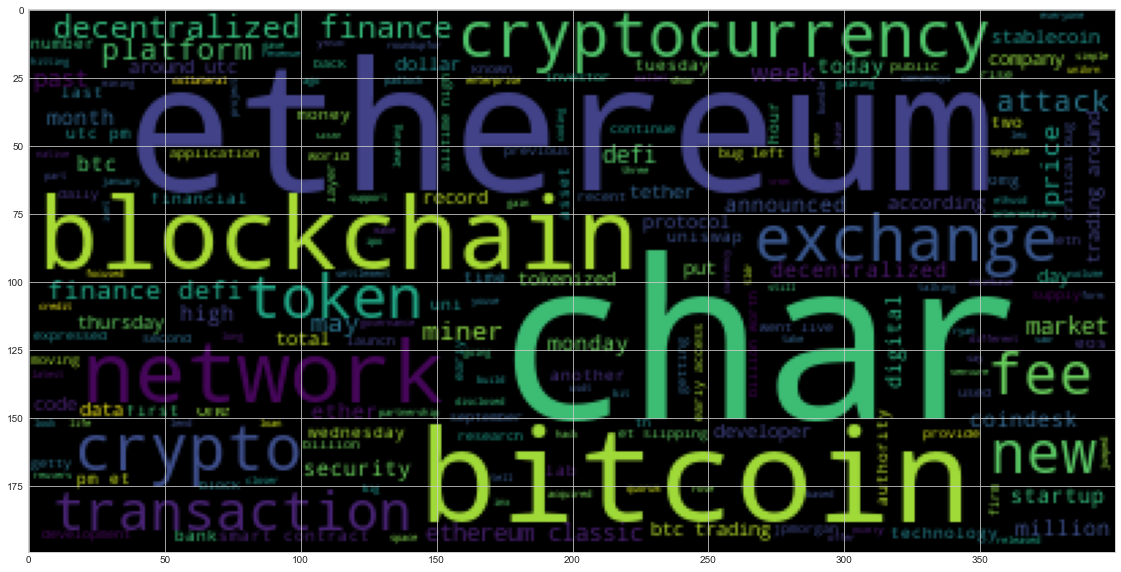

In [45]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

et_large_string = ' '.join(ethereum_df['Article_Name'])
et_finished = tokenizer(et_large_string)
et_entering_text = ' '.join(et_finished)
word_cloud_ethereum = WordCloud().generate(et_entering_text)
plt.imshow(word_cloud_ethereum)


# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [47]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [49]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_text = ' '.join(bitcoin_df['Article_Name'])
bitcoin_text

# structure from solved notebooks and refreshers


'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars] By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars] “The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars] LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars] LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustlin

In [50]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_document = nlp(bitcoin_text)
# Add a title to the document
# YOUR CODE HERE!
bitcoin_document.user_data["title"] = "Named Entity Recognition (NER) for Bitcoin"


# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [51]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_document, style='ent')

# structure from solved notebooks and refreshers
# structure also from https://monkeylearn.com/blog/named-entity-recognition-python/

In [52]:
# List all Entities
# YOUR CODE HERE!
for entity in bitcoin_document.ents:
    print(entity.text, entity.label_)


# structure from solved notebooks and refreshers
# structure also from https://monkeylearn.com/blog/named-entity-recognition-python/

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bi

---

## Ethereum NER

In [53]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_text = ' '.join(ethereum_df['Article_Name'])
ethereum_text

# structure from solved notebooks and refreshers


'If you\'ve interacted with cryptocurrencies in the past couple of years, there\'s a good chance you\'ve used MetaMask. It\'s a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars] September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee bl

In [54]:
# Run the NER processor on all of the text
# YOUR CODE HERE!


ethereum_document = nlp(ethereum_text)
# Add a title to the document
# YOUR CODE HERE!
ethereum_document.user_data["title"] = "Named Entity Recognition (NER) for Ethereum"



# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [55]:
# Render the visualization
# YOUR CODE HERE!
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_document, style='ent')

# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [56]:
# List all Entities
# YOUR CODE HERE!
for entity in ethereum_document.ents:
    print(entity.text, entity.label_)
    
    
# structure from solved notebooks and refreshers
# structure also from https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
September DATE
18 DATE
2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
Ethereum ORG
Mateusz Slodkowski/ PERSON
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
September DATE
16 DATE
2020 DATE
6